<a href="https://colab.research.google.com/github/kimheeseo/2022_AI_SW_Programmingstudy/blob/main/ensemble_fullcode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

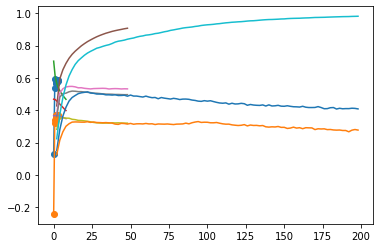

In [2]:
# libraries
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
%matplotlib inline

# read data
df = pd.read_csv('data07_diabetes.csv')
X = df.iloc[:,:-1]
y = df['Y']
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=0.5,random_state=1)

###########################################################
# Bagging Methods
###########################################################

from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=5)

# usual knn
knn.fit(xtrain,ytrain)
knn.score(xtrain,ytrain)
knn.score(xtest,ytest)

# full bagging
bf = BaggingRegressor(knn,n_estimators=100,max_samples=1.0,max_features=1.0,random_state=0)
bf.fit(xtrain,ytrain)
bf.score(xtrain,ytrain)
bf.score(xtest,ytest)

# bagging with subsampling and feature randomization
bf = BaggingRegressor(knn,n_estimators=500,max_samples=0.5,max_features=0.5)
bf.fit(xtrain,ytrain)
bf.score(xtrain,ytrain)
bf.score(xtest,ytest)

# effect of estimators
np.random.seed(0)
n_list = [1,5,10,20,30,50,100,200,500,1000]
s = np.zeros((len(n_list),2))
for i in range(len(n_list)):
    bf = BaggingRegressor(knn,n_estimators=n_list[i],max_samples=0.5,max_features=0.5)
    bf.fit(xtrain,ytrain)
    s[i,0] = bf.score(xtrain,ytrain)
    s[i,1] = bf.score(xtest,ytest)
plt.plot(np.log10(n_list),s,marker='o')

# parameter tunning
np.random.seed(1)
params = np.arange(2,20,2)
s = np.zeros((len(params),3))
for i in range(len(params)):
    f = BaggingRegressor(KNeighborsRegressor(params[i]),n_estimators=200,
                          random_state=0,max_samples=0.5,max_features=0.5,oob_score=True)
    f.fit(xtrain,ytrain)
    s[i,0] = f.score(xtrain,ytrain)
    s[i,1] = cross_val_score(f,xtrain,ytrain,cv=5).mean()
#    s[i,1] = f.oob_score_
    s[i,2] = f.score(xtest,ytest)
plt.plot(s)


###########################################################
# Random Forest
###########################################################

# random forest
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100,random_state=0)
rf.fit(xtrain,ytrain)
yhat_test = rf.predict(xtest)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)

# number of features to be chosen
rf = RandomForestRegressor(n_estimators=100,random_state=0,max_features='sqrt')
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)

# tree size
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)

# oob score
rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=100,
                           oob_score=True)
rf.fit(xtrain,ytrain)
rf.score(xtrain,ytrain)
rf.score(xtest,ytest)
rf.oob_score_  # out-of-bag score

# parameter tuning using oob scores
tree_size = np.arange(2,50,2)
s = np.zeros((len(tree_size),4))
for i in range(len(tree_size)):
    rf = RandomForestRegressor(n_estimators=100,random_state=0,
                           max_features='sqrt',max_leaf_nodes=tree_size[i],
                           oob_score=True)
    rf.fit(xtrain,ytrain)
    s[i,0] = rf.score(xtrain,ytrain)
    s[i,1] = rf.oob_score_ 
    s[i,2] = cross_val_score(rf,xtrain,ytrain,cv=5).mean()
    s[i,3] = rf.score(xtest,ytest)

plt.plot(tree_size,s)


###########################################################
# Gradient Boosted Tree
###########################################################

# gradient boosting regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(learning_rate=0.1,n_estimators=100,max_depth=3)
gb.fit(xtrain,ytrain)
yhat_test = gb.predict(xtest)
gb.score(xtrain,ytrain)
gb.score(xtest,ytest)

# number of estimators
n_list = np.arange(2,200,2)
s = np.zeros((len(n_list),3))
for i in range(len(n_list)):
    gb = GradientBoostingRegressor(learning_rate=0.1,
                                   n_estimators=n_list[i],max_depth=3)
    gb.fit(xtrain,ytrain)
    s[i,0] = gb.score(xtrain,ytrain)
    s[i,1] = cross_val_score(gb,xtrain,ytrain,cv=5).mean() 
    s[i,2] = gb.score(xtest,ytest)

plt.plot(n_list,s)

